In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from sklearn import feature_selection
from sklearn import preprocessing
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import ensemble
from sklearn import naive_bayes

np.set_printoptions(suppress=True)
pd.set_option("display.max_columns",2500)
pd.set_option("display.max_rows",2500)

In [3]:
####################---pre-processing---#####################
##org_dset=pd.read_csv("/home/avik_mint/MLproject/admission_prediction.csv")
org_dset=pd.read_csv("E:/AVIK_glsn/MLproject/admission_prediction.csv")


In [4]:
org_dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [5]:
org_dset["Chance of Admit"]# KeyError: 'Chance of Admit'
## this column is not recognized due to extra space at the end

KeyError: 'Chance of Admit'

In [6]:
org_dset.columns#Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit '], dtype='object')


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
org_dset.columns=org_dset.columns.str.strip()
#Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit'], dtype='object')


In [8]:
org_dset.head()
## Serial No. has no use hence can be dropped

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
prc_dset=org_dset.drop("Serial No.",axis=1)

In [10]:
prc_dset.describe()
## count=500 for all columns means no missing values and other attributes showing no anomaly as the values are as per criteria
## Dataset is clean with all numeric values

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


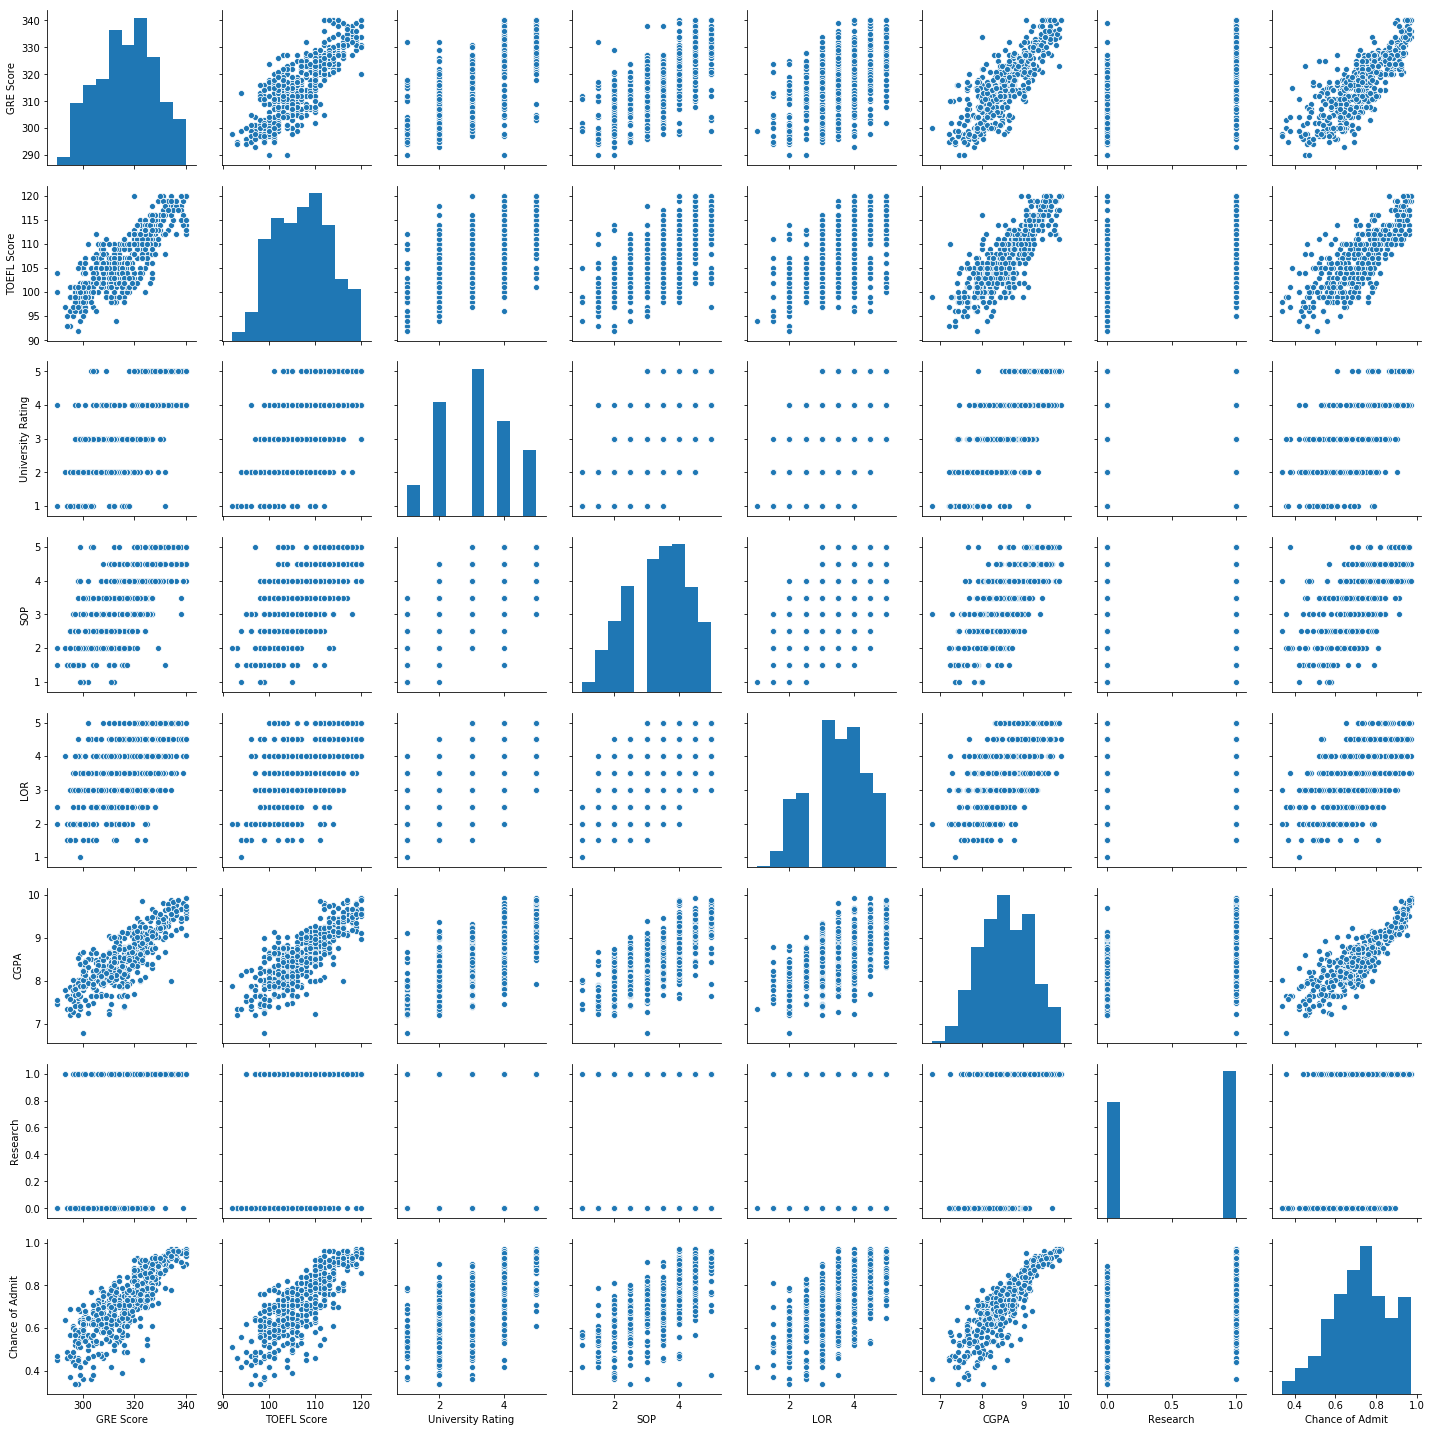

In [11]:
####################---EDA---################################

sns.pairplot(data=prc_dset)
## GRE,CGPA & TOEFL scores are showing linearity with Chance of Admit
## CGPA v GRE & CGPA v TOEFL showing more GRE/TOEFL score more is the CGPA
## GRE v TOEFL showing students with high GRE score also have high TOEFL score
## students with high CGPA have high SOP & LOR

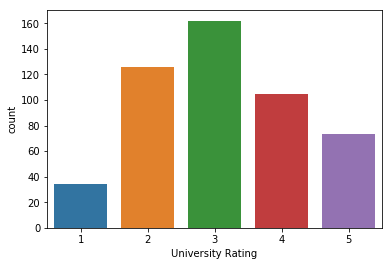

In [12]:
sns.countplot(x="University Rating",data=prc_dset)
## more students under Universities with rating 3

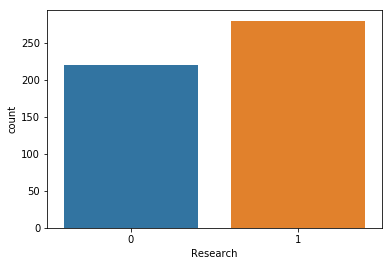

In [13]:
sns.countplot(x="Research",data=prc_dset)
## more students have done Research

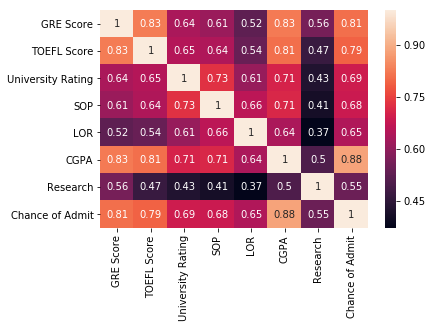

In [14]:
sns.heatmap(prc_dset.corr(),annot=True)
## Research has lesser correlation with Chance of Admit
## Research is not much important for Chance of admission in this dataset

C:\Users\Amit\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


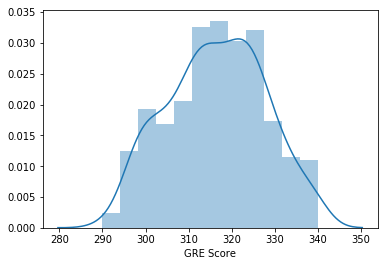

In [15]:
## checking whether GRE,TOEFL,CGPA are normalized
sns.distplot(prc_dset["GRE Score"])

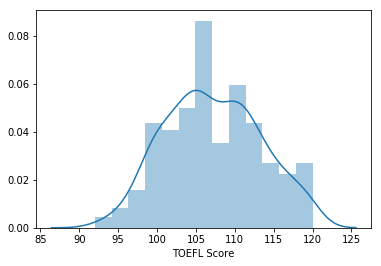

In [16]:
sns.distplot(prc_dset["TOEFL Score"])

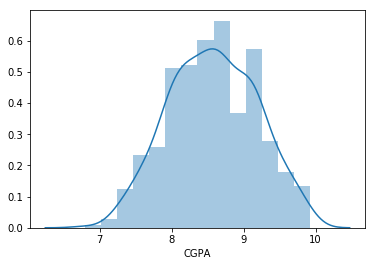

In [17]:
sns.distplot(prc_dset["CGPA"])
## all are more or less normalized

Text(0, 0.5, 'CGPA')

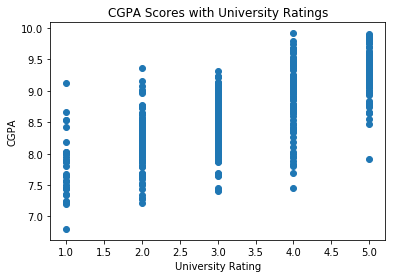

In [18]:
plt.scatter(prc_dset["University Rating"],prc_dset["CGPA"])
plt.title("CGPA Scores with University Ratings")
plt.xlabel("University Rating")
plt.ylabel("CGPA")
## more CGPA earned by students of better University

Text(0, 0.5, 'No. of Students')

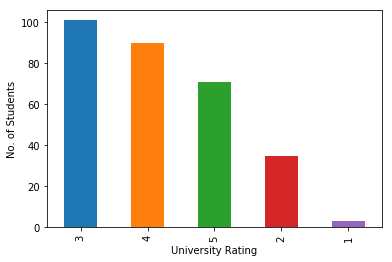

In [19]:
df = prc_dset[prc_dset["Chance of Admit"]>=0.7]["University Rating"].value_counts()
df.plot(kind="bar")
plt.xlabel("University Rating")
plt.ylabel("No. of Students")
## so students from good univesities have more chance of admission

In [20]:
X=prc_dset.drop("Chance of Admit",axis=1)
y=prc_dset["Chance of Admit"]
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.2,random_state=42)

In [22]:
#######################---Regression model---####################

# cross-validation
lm=linear_model.LinearRegression()
scores_lm=model_selection.cross_val_score(lm,Xtrain,ytrain,scoring="r2",cv=5)
scores_lm.mean()#0.8079016094502869

0.8079016094502867

In [23]:
tr=tree.DecisionTreeRegressor()
scores_tr=model_selection.cross_val_score(tr,Xtrain,ytrain,scoring="r2",cv=5)
scores_tr.mean()#0.6084804852113763

0.5947178249837398

In [24]:
knn=neighbors.KNeighborsRegressor()
scores_knn=model_selection.cross_val_score(knn,Xtrain,ytrain,scoring="r2",cv=5)
scores_knn.mean()#0.726214104416659

0.726214104416659

In [25]:
rnf=ensemble.RandomForestRegressor()
scores_rnf=model_selection.cross_val_score(rnf,Xtrain,ytrain,scoring="r2",cv=5)
scores_rnf.mean()#0.755942161446178

C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: Future

0.766668079742839

Text(0, 0.5, 'R2 Score')

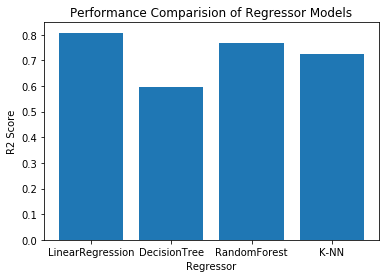

In [26]:
plt.bar(["LinearRegression","DecisionTree","RandomForest","K-NN"],np.array([scores_lm.mean(),scores_tr.mean(),scores_rnf.mean(),scores_knn.mean()]))
plt.title("Performance Comparision of Regressor Models")
plt.xlabel("Regressor")
plt.ylabel("R2 Score")

In [27]:
## Linear Regression is the best model for this dataset

lm.fit(Xtrain,ytrain)
ypred=lm.predict(Xtest)
print("RMSE:",np.sqrt(np.mean((ypred-ytest)**2)))#0.06086588041578309
print("Adjusted R2 method:",lm.score(Xtest,ytest))#0.8188432567829629

RMSE: 0.060865880415783113
Adjusted R2 method: 0.8188432567829629


In [32]:
## scaling doesn't affect the result much
stdscalar=preprocessing.StandardScaler()
X_std=stdscalar.fit_transform(X)
X=pd.DataFrame(X_std,columns=X.columns)
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.2,random_state=42)


C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [33]:
#######################---Regression model---####################

# cross-validation
lm=linear_model.LinearRegression()
scores_lm=model_selection.cross_val_score(lm,Xtrain,ytrain,scoring="r2",cv=5)
scores_lm.mean()#0.8079016094502869

0.8079016094502867

In [34]:
tr=tree.DecisionTreeRegressor()
scores_tr=model_selection.cross_val_score(tr,Xtrain,ytrain,scoring="r2",cv=5)
scores_tr.mean()#0.5959527167696415


0.5836997497148767

In [35]:
knn=neighbors.KNeighborsRegressor()
scores_knn=model_selection.cross_val_score(knn,Xtrain,ytrain,scoring="r2",cv=5)
scores_knn.mean()#0.77606362030338


0.77606362030338

In [36]:
rnf=ensemble.RandomForestRegressor()
scores_rnf=model_selection.cross_val_score(rnf,Xtrain,ytrain,scoring="r2",cv=5)
scores_rnf.mean()#0.7587131675867788


C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: Future

0.7606780151800298

Text(0, 0.5, 'R2 Score')

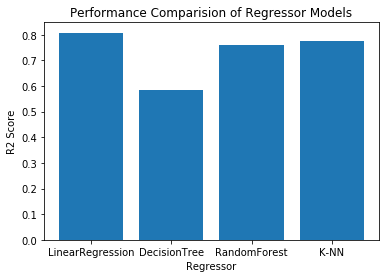

In [37]:
plt.bar(["LinearRegression","DecisionTree","RandomForest","K-NN"],np.array([scores_lm.mean(),scores_tr.mean(),scores_rnf.mean(),scores_knn.mean()]))
plt.title("Performance Comparision of Regressor Models")
plt.xlabel("Regressor")
plt.ylabel("R2 Score")


In [38]:
## Linear Regression is the best model for this dataset

lm.fit(Xtrain,ytrain)
ypred=lm.predict(Xtest)
print("RMSE:",np.sqrt(np.mean((ypred-ytest)**2)))#0.06086588041578309
print("Adjusted R2 method:",lm.score(Xtest,ytest))#0.8188432567829629


RMSE: 0.060865880415783155
Adjusted R2 method: 0.8188432567829628


C:\Users\Amit\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Amit\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Amit\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Amit\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


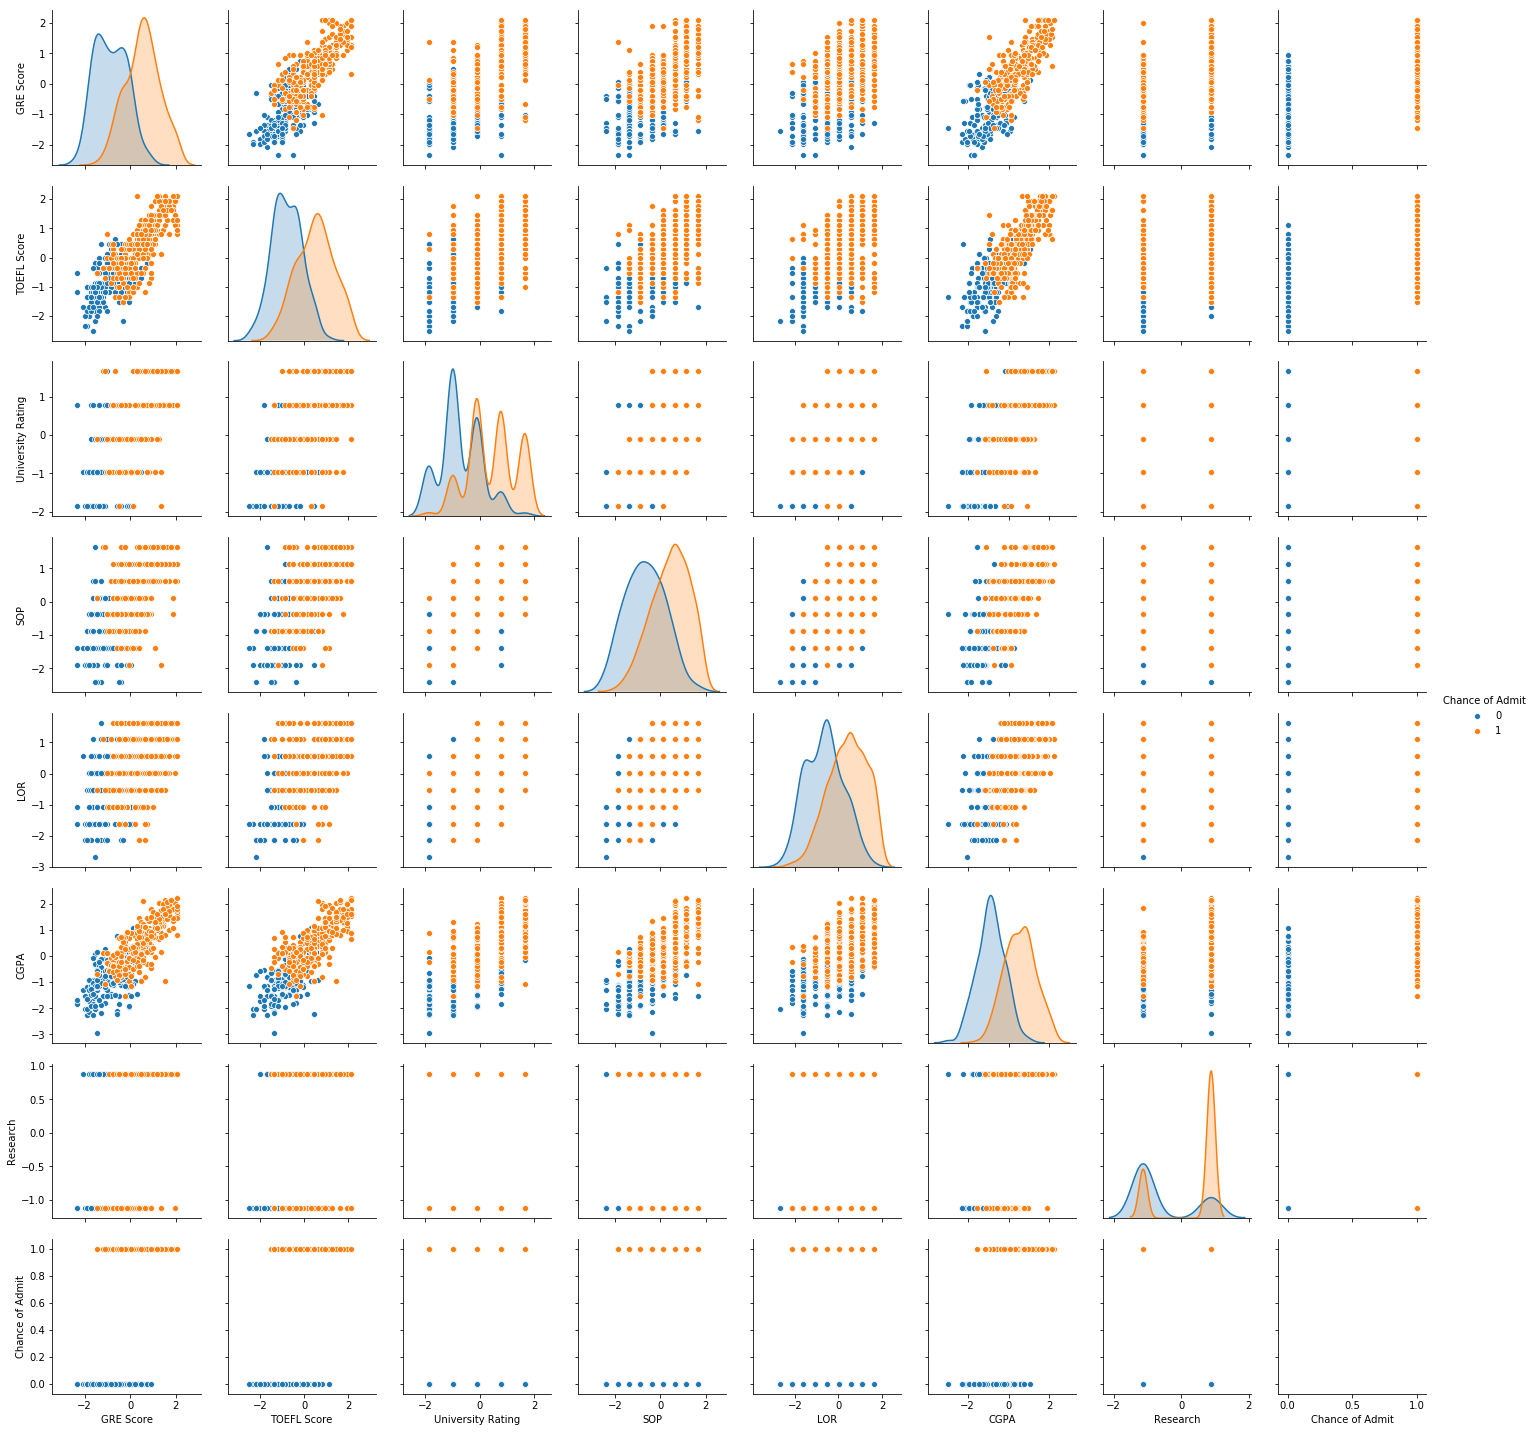

In [39]:
#################---Classification---###########################

## If Chance of Admit>=0.7 --> 1(student will get admitted)
## If Chance of Admit<0.7 --> 0(student will not get admitted)

y=np.array([1 if coa>=0.7 else 0 for coa in y])

cl_dset=X
cl_dset["Chance of Admit"]=pd.Series(y)
sns.pairplot(data=cl_dset,hue="Chance of Admit")
## TOEFL/GRE score v CGPA shows students with more CGPA,TOEFL,GRE
## are selected while those with less chance of selection


In [40]:
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.2,random_state=42)

lm=linear_model.LogisticRegression()
scores_lm=model_selection.cross_val_score(lm,Xtrain,ytrain,scoring="f1",cv=5)
scores_lm.mean()#0.8555858361346338


C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

1.0

In [41]:
tr=tree.DecisionTreeClassifier()
scores_tr=model_selection.cross_val_score(tr,Xtrain,ytrain,scoring="f1",cv=5)
scores_tr.mean()#0.860460062813004


1.0

In [42]:
knn=neighbors.KNeighborsClassifier()
scores_knn=model_selection.cross_val_score(knn,Xtrain,ytrain,scoring="f1",cv=5)
scores_knn.mean()#0.8445487537669354


0.9820129493846899

In [43]:
rnf=ensemble.RandomForestClassifier()
scores_rnf=model_selection.cross_val_score(rnf,Xtrain,ytrain,scoring="f1",cv=5)
scores_rnf.mean()#0.867416026625704


C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: Future

1.0

In [44]:
gnb=naive_bayes.GaussianNB()
scores_gnb=model_selection.cross_val_score(gnb,Xtrain,ytrain,scoring="f1",cv=5)
scores_gnb.mean()#0.88451155342027


1.0

In [45]:
## classification model scores are good but lets try scaling for more accuracy
## now scaling the values -- Standard Scalar
stdscalar=preprocessing.StandardScaler()
X_std=stdscalar.fit_transform(X)
X=pd.DataFrame(X_std,columns=X.columns)

Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.2,random_state=42)


C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [46]:
lm=linear_model.LogisticRegression()
scores_lm=model_selection.cross_val_score(lm,Xtrain,ytrain,scoring="f1",cv=5)
scores_lm.mean()#0.8555858361346338


C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

1.0

In [47]:
tr=tree.DecisionTreeClassifier()
scores_tr=model_selection.cross_val_score(tr,Xtrain,ytrain,scoring="f1",cv=5)
scores_tr.mean()#0.8479256965944273


1.0

In [48]:
knn=neighbors.KNeighborsClassifier()
scores_knn=model_selection.cross_val_score(knn,Xtrain,ytrain,scoring="f1",cv=5)
scores_knn.mean()#0.8445487537669354


1.0

In [49]:
rnf=ensemble.RandomForestClassifier()
scores_rnf=model_selection.cross_val_score(rnf,Xtrain,ytrain,scoring="f1",cv=5)
scores_rnf.mean()#0.8488100489780221


C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: Future

0.9959179423096949

In [50]:
gnb=naive_bayes.GaussianNB()
scores_gnb=model_selection.cross_val_score(gnb,Xtrain,ytrain,scoring="f1",cv=5)
scores_gnb.mean()#0.88451155342027


1.0

In [51]:
## Robust Scalar

X=prc_dset.drop("Chance of Admit",axis=1)

rbscalar=preprocessing.RobustScaler()
X_rb=rbscalar.fit_transform(X)
X=pd.DataFrame(X_rb,columns=X.columns)

Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.2,random_state=42)


In [52]:
lm=linear_model.LogisticRegression()
scores_lm_rb=model_selection.cross_val_score(lm,Xtrain,ytrain,scoring="f1",cv=5)
scores_lm_rb.mean()#0.8880065111231688

C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

0.8880065111231688

In [53]:
tr=tree.DecisionTreeClassifier()
scores_tr_rb=model_selection.cross_val_score(tr,Xtrain,ytrain,scoring="f1",cv=5)
scores_tr_rb.mean()#0.8515540585166106

0.8416654116655332

In [54]:
knn=neighbors.KNeighborsClassifier()
scores_knn_rb=model_selection.cross_val_score(knn,Xtrain,ytrain,scoring="f1",cv=5)
scores_knn_rb.mean()#0.8803192663233036

0.8803192663233036

In [55]:
rnf=ensemble.RandomForestClassifier()
scores_rnf_rb=model_selection.cross_val_score(rnf,Xtrain,ytrain,scoring="f1",cv=5)
scores_rnf_rb.mean()#0.8561003424229396


C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: Future

0.8705485332934906

In [56]:
gnb=naive_bayes.GaussianNB()
scores_gnb_rb=model_selection.cross_val_score(gnb,Xtrain,ytrain,scoring="f1",cv=5)
scores_gnb_rb.mean()#0.88451155342027
## Robust scaling gives significantly improved f1 scores



0.88451155342027

In [57]:
## Min-Max Scalar

X=prc_dset.drop("Chance of Admit",axis=1)

mmscalar=preprocessing.MinMaxScaler()
X_mm=mmscalar.fit_transform(X)
X=pd.DataFrame(X_mm,columns=X.columns)

Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.2,random_state=42)


C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [58]:
lm=linear_model.LogisticRegression()
scores_lm=model_selection.cross_val_score(lm,Xtrain,ytrain,scoring="f1",cv=5)
scores_lm.mean()#0.8676436911398222


C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

0.8676436911398222

In [59]:
tr=tree.DecisionTreeClassifier()
scores_tr=model_selection.cross_val_score(tr,Xtrain,ytrain,scoring="f1",cv=5)
scores_tr.mean()#0.8325690653432589


0.8487124849939975

In [60]:
knn=neighbors.KNeighborsClassifier()
scores_knn=model_selection.cross_val_score(knn,Xtrain,ytrain,scoring="f1",cv=5)
scores_knn.mean()#0.8690702309514726


0.8690702309514726

In [61]:
rnf=ensemble.RandomForestClassifier()
scores_rnf=model_selection.cross_val_score(rnf,Xtrain,ytrain,scoring="f1",cv=5)
scores_rnf.mean()#0.853432411674347


C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: Future

0.8582828774483205

In [62]:
gnb=naive_bayes.GaussianNB()
scores_gnb=model_selection.cross_val_score(gnb,Xtrain,ytrain,scoring="f1",cv=5)
scores_gnb.mean()#0.88451155342027
## Robust Scaling is the best option

0.88451155342027

Text(0, 0.5, 'F1 Score')

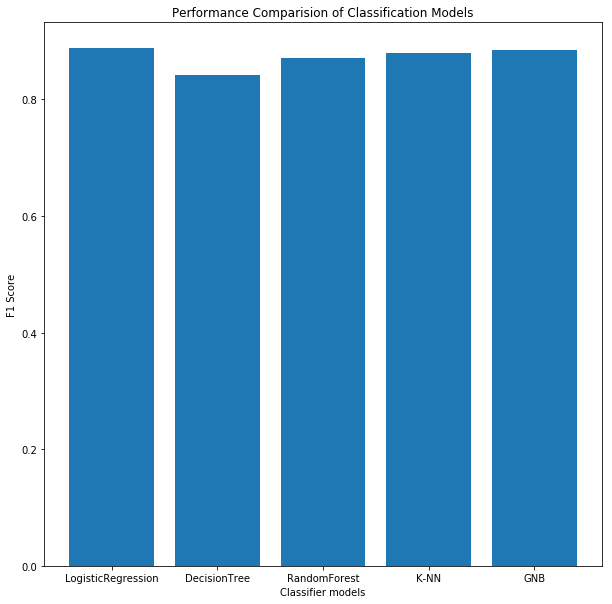

In [65]:
fig=plt.figure(figsize=(10,10))
plt.bar(["LogisticRegression","DecisionTree","RandomForest","K-NN","GNB"],np.array([scores_lm_rb.mean(),scores_tr_rb.mean(),scores_rnf_rb.mean(),scores_knn_rb.mean(),scores_gnb_rb.mean()]))
plt.title("Performance Comparision of Classification Models")
plt.xlabel("Classifier models")
plt.ylabel("F1 Score")


C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


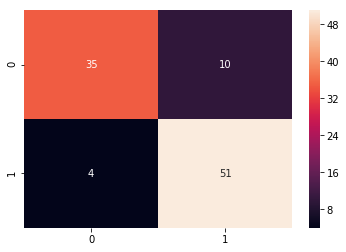

In [66]:
## Logistic Regression is the best classifier in this case

X=prc_dset.drop("Chance of Admit",axis=1)

rbscalar=preprocessing.RobustScaler()
X_rb=rbscalar.fit_transform(X)
X=pd.DataFrame(X_rb,columns=X.columns)
lm=linear_model.LogisticRegression()
lm.fit(Xtrain,ytrain)
ypred=lm.predict(Xtest)

confmat=metrics.confusion_matrix(ytest,ypred)

sns.heatmap(data=confmat,annot=True)


In [67]:
print("Accuracy Score:",metrics.accuracy_score(ytest,ypred))#Accuracy Score: 0.86
print("Precision Score:",metrics.precision_score(ytest,ypred))#Precision Score: 0.8596491228070176
print("Recall Score:",metrics.recall_score(ytest,ypred))#Recall Score: 0.8909090909090909
print("F1 Score:",metrics.f1_score(ytest,ypred))#F1 Score: 0.875


Accuracy Score: 0.86
Precision Score: 0.8360655737704918
Recall Score: 0.9272727272727272
F1 Score: 0.8793103448275862


In [68]:
## checking 3 important features
## Feature Scaling if works

obj=feature_selection.SelectKBest(feature_selection.f_classif,k=3)
obj.fit(X,y)

cols=X.columns.values[obj.get_support()]
X=X[cols]
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.2,random_state=42)

lm=linear_model.LinearRegression()
lm.fit(Xtrain,ytrain)
ypred=lm.predict(Xtest)

print("RMSE:",np.sqrt(np.mean((ypred-ytest)**2)))#0.06493112566455829
print("Adjusted R2 method:",lm.score(Xtest,ytest))#0.7938361330040753


RMSE: 0.3370740076815055
Adjusted R2 method: 0.5409337912950641


In [70]:
## accuracy decreased on feature scaling in regression model

rbscalar=preprocessing.RobustScaler()
X_rb=rbscalar.fit_transform(X)
X=pd.DataFrame(X_rb,columns=X.columns)
y=np.array([1 if coa>=0.7 else 0 for coa in y])

Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.2,random_state=42)

lm=linear_model.LogisticRegression()
lm.fit(Xtrain,ytrain)
ypred=lm.predict(Xtest)

print("Accuracy Score:",metrics.accuracy_score(ytest,ypred))#Accuracy Score: 0.86
print("Precision Score:",metrics.precision_score(ytest,ypred))#Precision Score: 0.8727272727272727
print("Recall Score:",metrics.recall_score(ytest,ypred))#Recall Score: 0.8727272727272727
print("F1 Score:",metrics.f1_score(ytest,ypred))#F1 Score: 0.8727272727272727

## though precision score increased a bit, more or less the model
## performance remained same

Accuracy Score: 0.86
Precision Score: 0.8727272727272727
Recall Score: 0.8727272727272727
F1 Score: 0.8727272727272727


C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
